In [12]:
# This notebook will be used to complete de Movie correlation Project.the aim is to find what element affect the gross revenue of a movie
# The dataset is downloaded from Kaggle covering 30 years (from 1986 to 2016) with multiples attributes such as genre,star actor, budget , revenue and so on.

# Importing the required libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #This is to adjust the configuration of the plot that we will create

# Let's read the data

df = pd.read_csv(r'C:\Users\user\Downloads\movies.csv\movies.csv')

In [11]:
# Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [14]:
# Let's see if there is any missing data.

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'. format(col,percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [21]:
# The result of the previous script shows there are missing values in some column. For greater clarity in our futur analysis, let'us drop the rows with missing data
df=df.dropna()



In [22]:
# let's check again if there is any missing values
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'. format(col,percent_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [17]:
# let's check the datatypes of our colums
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [26]:
# Let's change the datatype of our budget ,gross and votes columns

df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['votes']= df['votes'].astype('int64')


In [75]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,1980


In [28]:
# Create correct year column; as we can see, the realesed column cotain year that should be corresponding to the year column.
# We will extract the year in the released column to create a new column with the correct year.

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [31]:
# Let set the option to display all the rows when we are looking at the data
pd.set_option('display.max_rows', None)

### Analysis

#### Now that we have our dataframe in the expected form let's checks which variables are highly correlated to the gross revenue


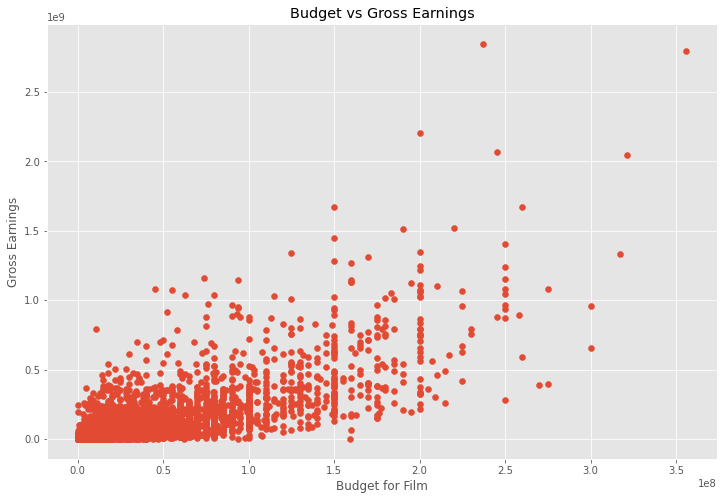

In [37]:
# Our first analysis track is to build a scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

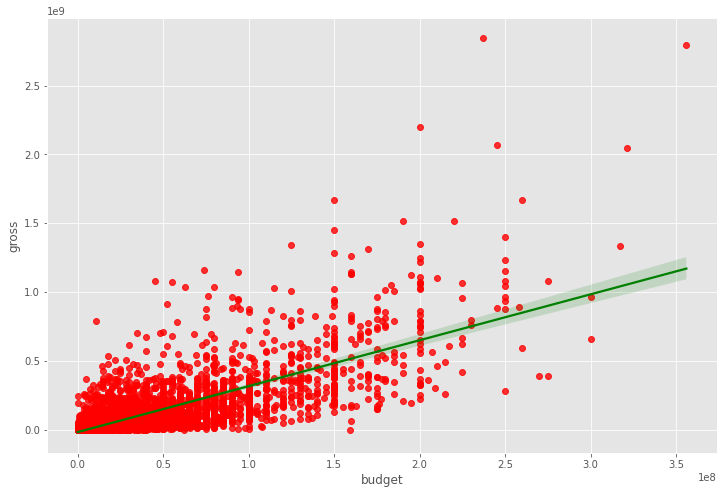

In [46]:
# let's plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df,scatter_kws={"color": "red"}, line_kws={"color": "green"})

In [48]:
# Let's look at correlation between our numerical fields : this shows that there is a higut correlation between budget and gross
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


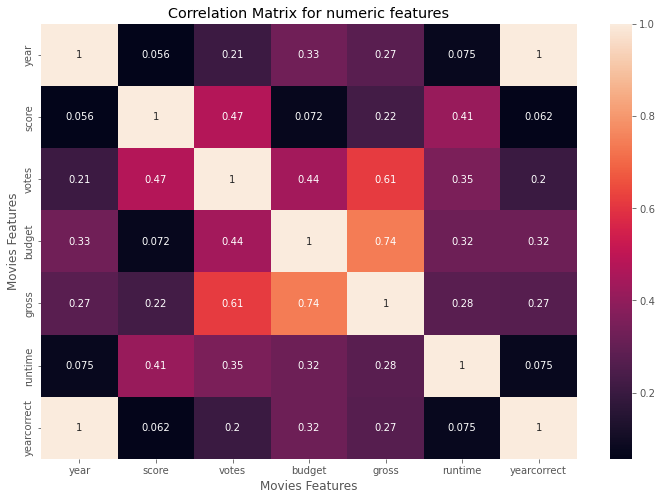

In [50]:
# Let's create a visualization for this correlation matrix

correlation_matrix= df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

## Conclusion

#### From this matrix we can find out that budget with 0.74 and votes with 0.61 are highly correlated to the gross revenue.

#### That's the end of our project and this notebook